## Madrid 10K Run

#### Short presentation

I am Eva Donaque and I am currently involved in the part-time data analytics course at Ironhack. I really enjoy to see the progress I have made in just a few months. It is even funny to see how things that seemed impossible at first can now even be considered a "piece of cake". Please have a look below at my data visualization project on the popular 10K race "San Silvestre Vallecana".

#### Introduction

Every December 31st the city of Madrid wakes up early to enjoy the last day of the year. What a better way to do so than with a 10K run? It's the perfect way to leave behind the previous year and kick start the new one with a strong foot (literally). The name of this race is "San Silvestre Vallecana" and for this project we will be using the data available from 2019. 

The "San Silvestre Vallecana" is ran by people from 16 to 88+ years old. Given the popularity of the run, the profiles of the runners vary. Some runners just do it for fun while others try to compete and beat personal records. 

The dataset contains information of all 23K participants including: id number, overall position of the runner, position of each runner in his/her category, category by age, gender, seconds passed at 2.5 km, 5 km, 7.5 km and 10 km. 

Please refer to the bottom of this notebook to find the Machine Learning section.

# Let's run it! (literally)

Import all necessary libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.patches as patches

Download the `madrid_10k` dataset from [here](https://drive.google.com/drive/folders/1GunsUDvEUbkKIfkdSBBDVWYSsOaPVWBM) and place it in the data folder.
Load and save your dataset in a variable called `madrid_10k`.

In [3]:
madrid_10k = pd.read_csv('../data/madrid_10k.csv')
madrid_10k = madrid_10k.rename(columns=lambda x: x.strip()) 
madrid_10k

,id_number,place,cat_place,age_category,sex,2.5km_seconds,5km_seconds,7.5km_seconds,total_seconds
0,48276,34114,2361.0,45-54,F,NaN,NaN,NaN,6885
1,20210,34113,6107.0,23-34,M,NaN,5690.0,6932.0,8587
2,26195,34112,3344.0,35-44,F,3203.0,4558.0,5756.0,7192
3,44187,34110,3341.0,35-44,F,NaN,3269.0,4960.0,6760
4,26516,34109,2360.0,45-54,F,1809.0,3479.0,5033.0,6724
...,...,...,...,...,...,...,...,...,...
23616,20665,5,2.0,23-34,M,443.0,899.0,1339.0,1849
23617,3485,4,3.0,35-44,M,450.0,891.0,1332.0,1846
23618,5119,3,2.0,35-44,M,464.0,861.0,1276.0,1787
23619,5994,2,1.0,35-44,M,435.0,864.0,1280.0,1785


Explore the madrid_10k dataset using Pandas dtypes and describe.

In [4]:
madrid_10k.describe()

,id_number,place,cat_place,2.5km_seconds,5km_seconds,7.5km_seconds,total_seconds
count,23621.000000,23621.000000,23620.000000,21291.000000,23602.000000,23620.000000,23621.000000
mean,23487.257610,16040.539224,2124.876969,940.813771,1799.656427,2639.903472,3618.721773
std,14188.207254,10136.299063,1752.714509,265.360608,400.644041,553.349164,764.380181
min,3001.000000,1.000000,1.000000,433.000000,861.000000,1276.000000,1775.000000
25%,10853.000000,6783.000000,655.000000,779.000000,1517.250000,2231.000000,3033.000000
50%,21382.000000,15779.000000,1683.500000,901.000000,1746.000000,2580.000000,3537.000000
75%,36774.000000,24804.000000,3218.000000,1051.000000,2039.000000,3002.000000,4111.000000
max,49520.000000,34114.000000,7150.000000,3203.000000,5690.000000,6932.000000,8587.000000


In [5]:
madrid_10k.dtypes

id_number          int64
place              int64
cat_place        float64
age_category      object
sex               object
2.5km_seconds    float64
5km_seconds      float64
7.5km_seconds    float64
total_seconds      int64
dtype: object

Check for any missing values. 

In [6]:
madrid_10k.isnull().sum()

id_number           0
place               0
cat_place           1
age_category        1
sex                 0
2.5km_seconds    2330
5km_seconds        19
7.5km_seconds       1
total_seconds       0
dtype: int64

What to do with missing values?

In [7]:
madrid_10k = madrid_10k.dropna()
madrid_10k
#I decided to drop them since the amount of data that is missing accounts for 9.88%.
#This is quite a low percentage that would likely not have a big impact 
#in the end results. 

,id_number,place,cat_place,age_category,sex,2.5km_seconds,5km_seconds,7.5km_seconds,total_seconds
2,26195,34112,3344.0,35-44,F,3203.0,4558.0,5756.0,7192
4,26516,34109,2360.0,45-54,F,1809.0,3479.0,5033.0,6724
5,49126,34108,5758.0,45-54,M,1523.0,3206.0,4799.0,6710
6,42024,34107,431.0,20-22,F,1575.0,3189.0,4711.0,6613
7,49503,34105,3340.0,35-44,F,1438.0,2937.0,4504.0,6469
...,...,...,...,...,...,...,...,...,...
23616,20665,5,2.0,23-34,M,443.0,899.0,1339.0,1849
23617,3485,4,3.0,35-44,M,450.0,891.0,1332.0,1846
23618,5119,3,2.0,35-44,M,464.0,861.0,1276.0,1787
23619,5994,2,1.0,35-44,M,435.0,864.0,1280.0,1785


What is the mean `total_seconds` of the whole run?

In [8]:
madrid_10k['total_seconds'].mean()

3595.64081728511

What is the mean `total_seconds` by `sex`?

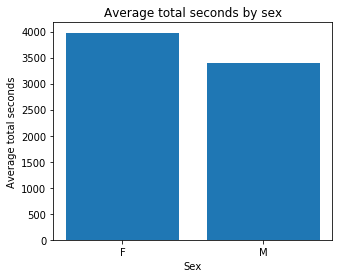

In [9]:
mean_sex=madrid_10k.groupby('sex')['total_seconds'].mean().reset_index()
plt.subplots(figsize=(5,4))
plt.bar(mean_sex['sex'],mean_sex['total_seconds'])
plt.title('Average total seconds by sex')
plt.xlabel('Sex')
plt.ylabel('Average total seconds')
plt.show()

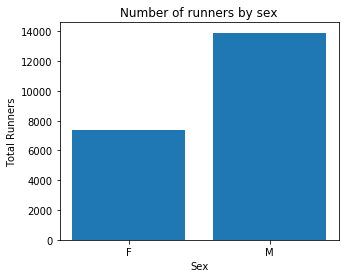

In [10]:
number_sex=madrid_10k.groupby('sex')['id_number'].count().reset_index()
plt.subplots(figsize=(5,4))
plt.bar(number_sex['sex'],number_sex['id_number'])
plt.title('Number of runners by sex')
plt.xlabel('Sex')
plt.ylabel('Total Runners')
plt.show()

In [11]:
madrid_10k.groupby('sex')['id_number'].count()

sex
F     7378
M    13912
Name: id_number, dtype: int64

What is the mean `total_seconds` by `age_category`?

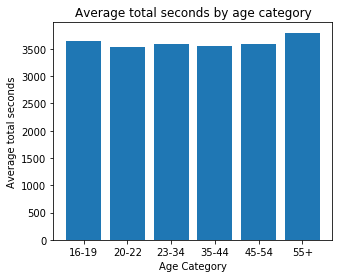

In [12]:
mean_age_category=madrid_10k.groupby('age_category')['total_seconds'].mean().reset_index()
plt.subplots(figsize=(5,4))
plt.bar(mean_age_category['age_category'],mean_age_category['total_seconds'])
plt.title('Average total seconds by age category')
plt.xlabel('Age Category')
plt.ylabel('Average total seconds')
plt.show()

What is the mean `total_seconds` per `sex` and `age_category`? Make a bar chart.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


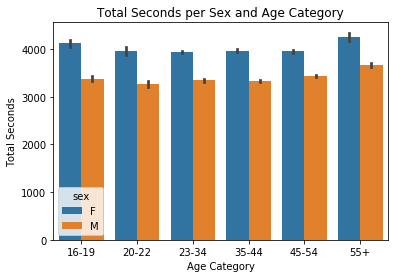

In [13]:
madrid_10k['age_category_number']=madrid_10k['age_category']
madrid_10k['age_category_number'].replace(['16-19','20-22','23-34','35-44','45-54','55+'],[1,2,3,4,5,6], inplace=True)
madrid_10k=madrid_10k.sort_values(['age_category_number']).reset_index(drop=True)
sns.barplot(x='age_category', y='total_seconds', hue='sex', data=madrid_10k)
plt.title('Total Seconds per Sex and Age Category')
plt.xlabel('Age Category')
plt.ylabel('Total Seconds')
plt.show()

What is the mean `total_seconds` per `sex` and `age_category`? Make a line chart.

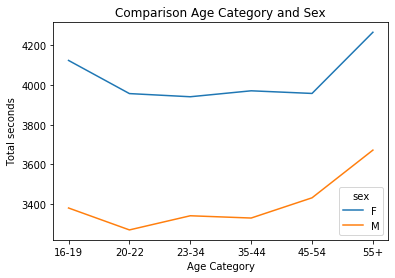

In [14]:
madrid_10k_pivot= madrid_10k.pivot_table(index='age_category',columns='sex',values='total_seconds',aggfunc='mean')
madrid_10k_pivot.plot()
plt.title('Comparison Age Category and Sex')
plt.xlabel('Age Category')
plt.ylabel('Total seconds')
plt.show()

Summary statistic of the `age_category`.

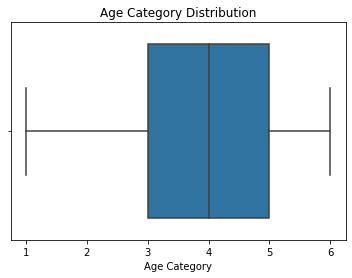

In [15]:
pd.to_numeric(madrid_10k['age_category_number'], errors='coerce')
sns.boxplot(x='age_category_number', data=madrid_10k)
plt.title('Age Category Distribution')
plt.xlabel('Age Category')
plt.show()

~~~~
From this boxplot we get that the median Age Category is 4 which accounts for 35-44 years old.  
Also we appreciate that most of the runners are within 23 and 54 years old. 
~~~~

Distribution of `age_category`.

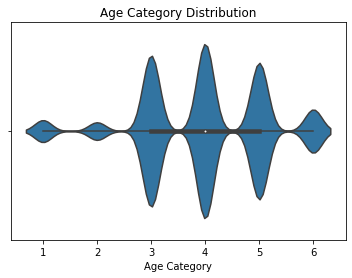

In [16]:
sns.violinplot('age_category_number', data=madrid_10k)
plt.title('Age Category Distribution')
plt.xlabel('Age Category')
plt.show()

~~~~
From this violinplot we see again the median (white dot) in category 4 (35-44). Also, we can appreciate the distribution of the data within the categories 3 to 5 which accounts for runners within 23 and 54 years old. 
~~~~

Distribution of `age_category`.

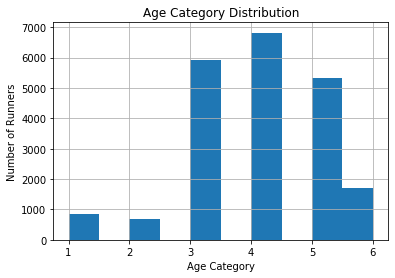

In [17]:
madrid_10k.hist('age_category_number')
plt.title('Age Category Distribution')
plt.xlabel('Age Category')
plt.ylabel('Number of Runners')
plt.show()

Make a comparison between the 4 stages of the run. Does the average speed changes throguhtout the different milestones?

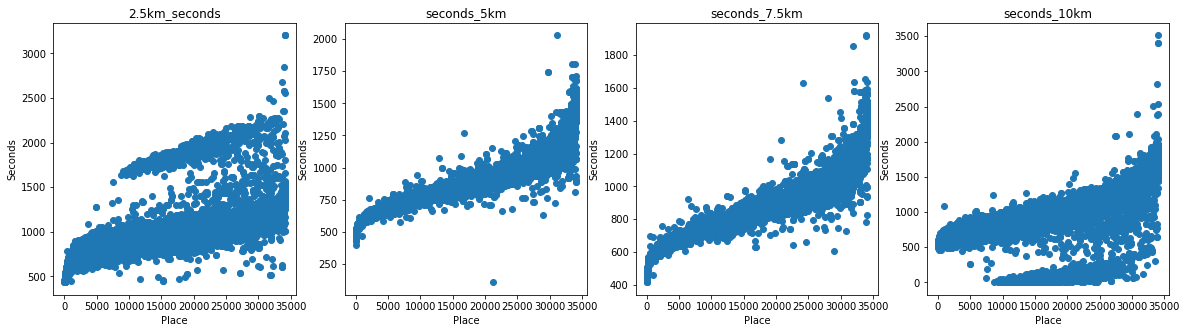

In [18]:
madrid_10k['seconds_5km']=madrid_10k['5km_seconds'] - madrid_10k['2.5km_seconds']
madrid_10k['seconds_7.5km']=madrid_10k['7.5km_seconds'] - madrid_10k['5km_seconds']
madrid_10k['seconds_10km']=madrid_10k['total_seconds'] - madrid_10k['7.5km_seconds']
activity = madrid_10k[['2.5km_seconds','seconds_5km', 'seconds_7.5km','seconds_10km', 'place', 'sex']]
activity
# Create a figure of a fixed size and axes
fig, axs = plt.subplots(1,4, figsize = (20,5))

# Iterate to draw each scatter plot
x=0
for ax in axs:
    ax = ax.scatter(activity['place'],activity.iloc[:,x])
    axs[x].set_title(activity.columns[x])   
    axs[x].set_xlabel('Place')   
    axs[x].set_ylabel('Seconds')   
    x+=1

plt.show()

~~~~
From these scatter plots we can see that in the beggining of the run there was a tendency to go fast, however this went lower after passing the 2.5 km. Speed started increasing after passing the 5km and to end well, runners had a tendency to make a final sprint. 
~~~~

How was the performance of the top 10 performers for every milestone?

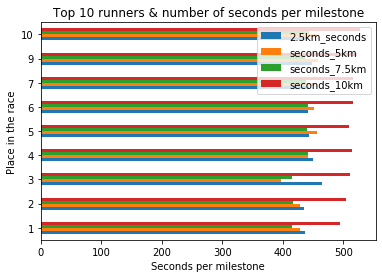

In [19]:
madrid_10k.groupby('place')[['2.5km_seconds', 'seconds_5km', 'seconds_7.5km', 'seconds_10km','total_seconds']].agg('sum').nsmallest(9, 'total_seconds')[['2.5km_seconds', 'seconds_5km', 'seconds_7.5km', 'seconds_10km']].plot.barh()
plt.title('Top 10 runners & number of seconds per milestone')
plt.xlabel('Seconds per milestone')
plt.ylabel('Place in the race')
plt.show()

~~~~
From this barchart we can see that most runners kept a similar speed throught the first 3 milestones. However, all of them reduced their speed during the quarter of the run.  
~~~~

Within which `age_category` and `sex` where the top 10 performers of the run?

In [20]:
top_10=madrid_10k.sort_values('place').head(9)
top_10

,id_number,place,cat_place,age_category,sex,2.5km_seconds,5km_seconds,7.5km_seconds,total_seconds,age_category_number,seconds_5km,seconds_7.5km,seconds_10km
4354,20731,1,1.0,23-34,M,437.0,866.0,1281.0,1775,3,429.0,415.0,494.0
13549,5994,2,1.0,35-44,M,435.0,864.0,1280.0,1785,4,429.0,416.0,505.0
9167,5119,3,2.0,35-44,M,464.0,861.0,1276.0,1787,4,397.0,415.0,511.0
9166,3485,4,3.0,35-44,M,450.0,891.0,1332.0,1846,4,441.0,441.0,514.0
5500,20665,5,2.0,23-34,M,443.0,899.0,1339.0,1849,3,456.0,440.0,510.0
5499,3908,6,3.0,23-34,M,442.0,893.0,1334.0,1850,3,451.0,441.0,516.0
17492,4214,7,1.0,45-54,M,444.0,897.0,1335.0,1851,5,453.0,438.0,516.0
9165,4181,9,4.0,35-44,M,448.0,906.0,1343.0,1866,4,458.0,437.0,523.0
1394,16876,10,1.0,20-22,M,440.0,897.0,1341.0,1868,2,457.0,444.0,527.0


In [ ]:
top_10_pivot= top_10.pivot_table(index='place',columns=['sex', 'age_category'],values='total_seconds')
top_10_pivot.plot(kind='hist', figsize= (5,5))
plt.title('Top 10 runners')
plt.show()

~~~~
Top performers were all males and within 4 categories: 23-34, 35-44, 45-54, 20-22.
~~~~

# Machine Learning

- Is it possible to build a model that can accurately predict the final result of a runner given his/her splits until the 7.5 km and his/her demographics? 
- Is it possible to build a model that can accurately predict whether the runner is a woman or a men?


In [21]:
#Request the right libraries and change categorical values into dummy ones
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score

madrid_10k_fixed=madrid_10k

In [23]:
madrid_10k_fixed.head()

,id_number,place,cat_place,age_category,sex,2.5km_seconds,5km_seconds,7.5km_seconds,total_seconds,age_category_number,seconds_5km,seconds_7.5km,seconds_10km,16-19,20-22,23-34,35-44,45-54,55+
0,27976,19359,135.0,16-19,F,1126.0,2005.0,2853.0,3732,1,879.0,848.0,879.0,0,0,0,0,0,0
1,4861,9053,379.0,16-19,M,819.0,1598.0,2319.0,3180,1,779.0,721.0,861.0,0,0,0,0,0,0
2,3552,15266,607.0,16-19,M,977.0,1808.0,2589.0,3513,1,831.0,781.0,924.0,0,0,0,0,0,0
3,39620,9049,378.0,16-19,M,1003.0,1782.0,2502.0,3180,1,779.0,720.0,678.0,0,0,0,0,0,0
4,26867,18415,121.0,16-19,F,1191.0,2088.0,2914.0,3674,1,897.0,826.0,760.0,0,0,0,0,0,0


In [24]:
#Create 6 dummy variables for age_category 
age_category=['16-19','20-22','23-34','35-44','45-54', '55+']
for x in age_category:
    madrid_10k_fixed[x]=0
madrid_10k_fixed.head()

,id_number,place,cat_place,age_category,sex,2.5km_seconds,5km_seconds,7.5km_seconds,total_seconds,age_category_number,seconds_5km,seconds_7.5km,seconds_10km,16-19,20-22,23-34,35-44,45-54,55+
0,27976,19359,135.0,16-19,F,1126.0,2005.0,2853.0,3732,1,879.0,848.0,879.0,0,0,0,0,0,0
1,4861,9053,379.0,16-19,M,819.0,1598.0,2319.0,3180,1,779.0,721.0,861.0,0,0,0,0,0,0
2,3552,15266,607.0,16-19,M,977.0,1808.0,2589.0,3513,1,831.0,781.0,924.0,0,0,0,0,0,0
3,39620,9049,378.0,16-19,M,1003.0,1782.0,2502.0,3180,1,779.0,720.0,678.0,0,0,0,0,0,0
4,26867,18415,121.0,16-19,F,1191.0,2088.0,2914.0,3674,1,897.0,826.0,760.0,0,0,0,0,0,0


In [25]:
for x in age_category:
    madrid_10k_fixed[x]=madrid_10k_fixed['age_category'].str.contains(x).astype(int)

In [26]:
madrid_10k_fixed.head()

,id_number,place,cat_place,age_category,sex,2.5km_seconds,5km_seconds,7.5km_seconds,total_seconds,age_category_number,seconds_5km,seconds_7.5km,seconds_10km,16-19,20-22,23-34,35-44,45-54,55+
0,27976,19359,135.0,16-19,F,1126.0,2005.0,2853.0,3732,1,879.0,848.0,879.0,1,0,0,0,0,0
1,4861,9053,379.0,16-19,M,819.0,1598.0,2319.0,3180,1,779.0,721.0,861.0,1,0,0,0,0,0
2,3552,15266,607.0,16-19,M,977.0,1808.0,2589.0,3513,1,831.0,781.0,924.0,1,0,0,0,0,0
3,39620,9049,378.0,16-19,M,1003.0,1782.0,2502.0,3180,1,779.0,720.0,678.0,1,0,0,0,0,0
4,26867,18415,121.0,16-19,F,1191.0,2088.0,2914.0,3674,1,897.0,826.0,760.0,1,0,0,0,0,0


In [27]:
#Create 1 dummy variable for sex
sex=['M']
for x in sex:
    madrid_10k_fixed[x]=0
for x in sex:
    madrid_10k_fixed[x]=madrid_10k_fixed['sex'].str.contains(x).astype(int)
madrid_10k_fixed

,id_number,place,cat_place,age_category,sex,2.5km_seconds,5km_seconds,7.5km_seconds,total_seconds,age_category_number,seconds_5km,seconds_7.5km,seconds_10km,16-19,20-22,23-34,35-44,45-54,55+,M
0,27976,19359,135.0,16-19,F,1126.0,2005.0,2853.0,3732,1,879.0,848.0,879.0,1,0,0,0,0,0,0
1,4861,9053,379.0,16-19,M,819.0,1598.0,2319.0,3180,1,779.0,721.0,861.0,1,0,0,0,0,0,1
2,3552,15266,607.0,16-19,M,977.0,1808.0,2589.0,3513,1,831.0,781.0,924.0,1,0,0,0,0,0,1
3,39620,9049,378.0,16-19,M,1003.0,1782.0,2502.0,3180,1,779.0,720.0,678.0,1,0,0,0,0,0,1
4,26867,18415,121.0,16-19,F,1191.0,2088.0,2914.0,3674,1,897.0,826.0,760.0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21285,14688,5589,252.0,55+,M,956.0,1662.0,2351.0,2960,6,706.0,689.0,609.0,0,0,0,0,0,1,1
21286,22075,24565,1555.0,55+,M,1018.0,2019.0,2884.0,4095,6,1001.0,865.0,1211.0,0,0,0,0,0,1,1
21287,13483,5578,251.0,55+,M,768.0,1483.0,2169.0,2959,6,715.0,686.0,790.0,0,0,0,0,0,1,1
21288,8638,24333,237.0,55+,F,1031.0,2000.0,2938.0,4079,6,969.0,938.0,1141.0,0,0,0,0,0,1,0


In [28]:
#Take total_seconds as dependent variable
y=madrid_10k_fixed['total_seconds']
X= madrid_10k_fixed[['16-19','20-22','23-34','35-44','45-54','55+','M', '2.5km_seconds', 'seconds_5km', 'seconds_7.5km']]

In [29]:
#Split the data with test size=0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [30]:
#Run Linear Regression
model = LinearRegression()

In [31]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9708817519846125

In [32]:
from math import sqrt
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test)
regression_error = y_pred - y_test
print('R square of regression...',model.score(X_test,y_test))
print('RMSE of regression...',sqrt(mean_squared_error(y_test, y_pred)))

R square of regression... 0.9708817519846125
RMSE of regression... 131.42466560776788


Text(0, 0.5, 'Number of Runners')

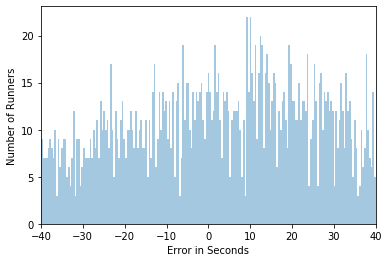

In [102]:
sns.distplot(regression_error, np.linspace(-40,40,200), kde = False)
plt.xlim([-40,40])
plt.xlabel('Error in Seconds')
plt.ylabel('Number of Runners')
#Paolo: In the first instance I would plot all data, not only the ones in between -40s, 40s to have
# a clearer view

In [41]:
pd.DataFrame({'test':y_test, 'predicted':y_pred})

,test,predicted
17261,3452,3485.102361
20327,3488,3643.021572
158,4183,4140.077964
12952,5080,4925.559597
16034,2905,2904.923849
...,...,...
754,2649,2655.905873
8726,2849,2894.213601
11553,5318,5439.550133
3050,3143,3194.239925


In [35]:
df = pd.DataFrame({'test':y_test, 'predicted':y_pred})
df = df.reset_index(drop=True)
df = df.reset_index()
data = pd.melt(df, id_vars=['index'], value_vars=['test', 'predicted'])

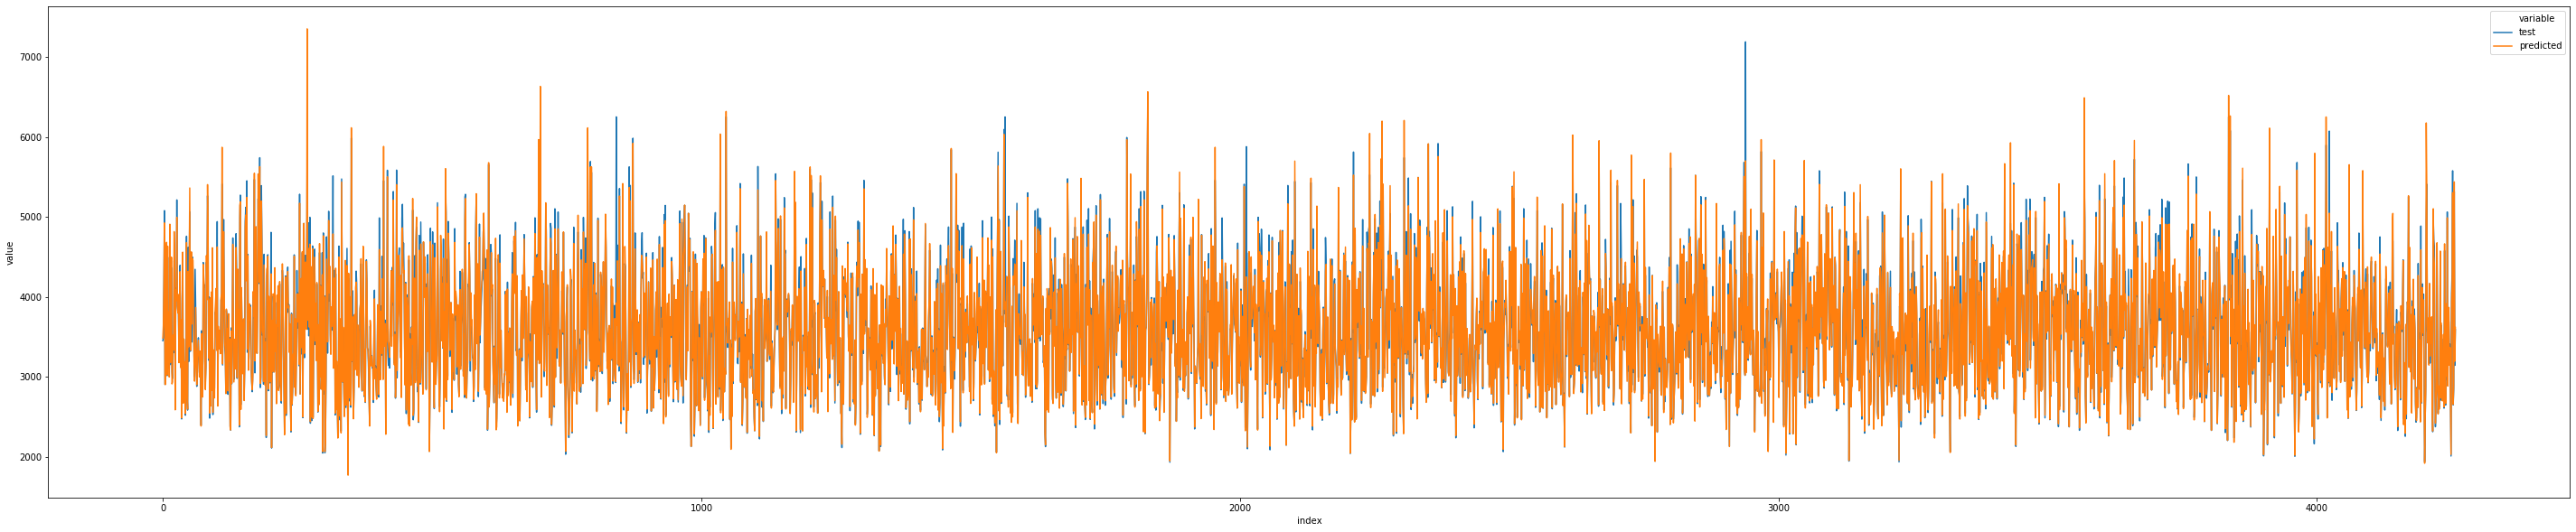

In [36]:
plt.figure(figsize=(50,10))
sns.lineplot(x="index", y="value", hue="variable", data=data)
#Paolo: fonts are too small to read in the plot. Better to plot the difference between the two so you have
# only one line to follow that should oscillate around zero

In [42]:
#Run Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9679195411106285

In [43]:
y_pred = model.predict(X_test)
decision_tree_regression_error = y_pred - y_test
print('R square of regression...',model.score(X_test,y_test))
print('RMSE of regression...',sqrt(mean_squared_error(y_test, decision_tree_regression_error)))

R square of regression... 0.9679195411106285
RMSE of regression... 3690.59627333413


Text(0, 0.5, 'Number of Runners')

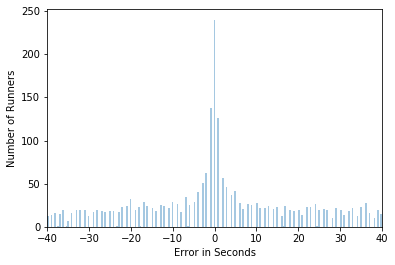

In [98]:
sns.distplot(decision_tree_regression_error, np.linspace(-40,40,200), kde = False)
plt.xlim([-40,40]) 
plt.xlabel('Error in Seconds')
plt.ylabel('Number of Runners')

In [76]:
np.sqrt(4500)

67.08203932499369

In [45]:
pd.DataFrame({'test':y_test, 'predicted':y_pred})

,test,predicted
17261,3452,3429.0
20327,3488,3521.0
158,4183,4008.0
12952,5080,4850.0
16034,2905,2847.0
...,...,...
754,2649,2613.0
8726,2849,2942.0
11553,5318,5262.0
3050,3143,3233.0


In [46]:
df = pd.DataFrame({'test':y_test, 'predicted':y_pred})
df = df.reset_index(drop=True)
df = df.reset_index()
data = pd.melt(df, id_vars=['index'], value_vars=['test', 'predicted'])

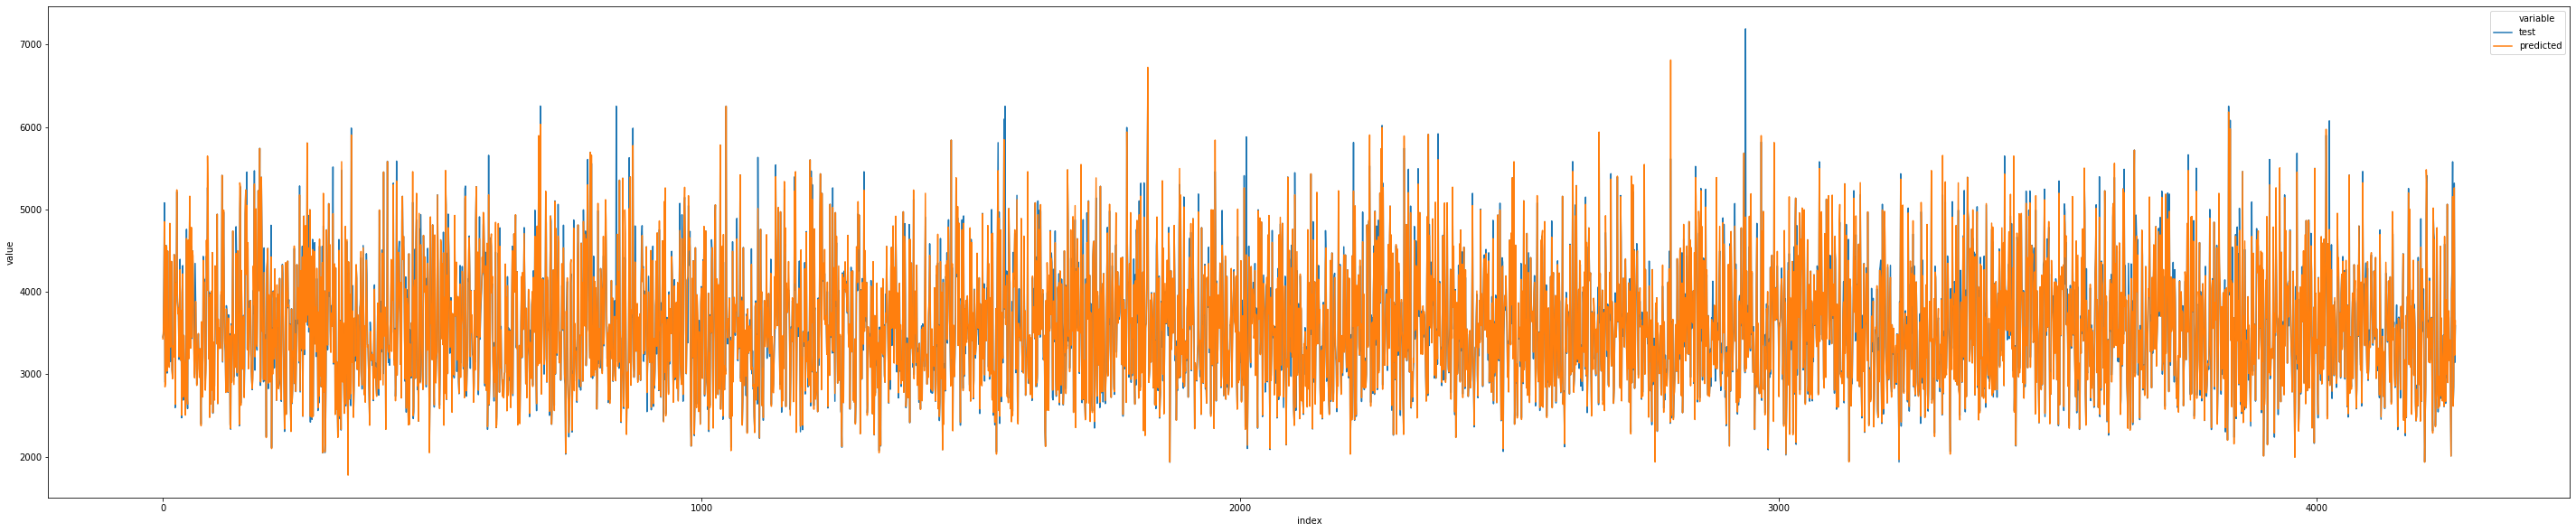

In [47]:
plt.figure(figsize=(50,10))
sns.lineplot(x="index", y="value", hue="variable", data=data)

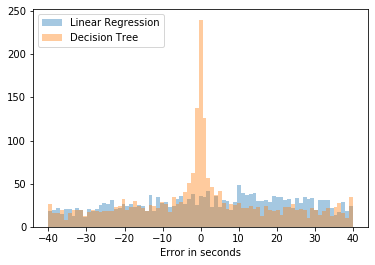

In [110]:
#Comparison between Linear Regression and Decision Tree
sns.distplot(regression_error, np.linspace(-40,40,80), kde = False)
sns.distplot(decision_tree_regression_error,np.linspace(-40,40,80), kde = False)
plt.xlabel('Error in seconds')
plt.legend(['Linear Regression','Decision Tree'], loc = 2);

In [49]:
#Sex becomes the dependent variables
y=madrid_10k_fixed['M']
X= madrid_10k_fixed[['16-19','20-22','23-34','35-44','45-54','55+','2.5km_seconds', 'seconds_5km', 'seconds_7.5km', 'seconds_10km','total_seconds']]

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


In [51]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

In [103]:
#Run Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=1000)
rfc.fit(X_train,y_train)
y_pred_rf = rfc.predict(X_test)
y_score_rf = rfc.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_score_rf)
print('Random Forest ROC AUC', auc(fpr_rf, tpr_rf))
print(classification_report(y_test, y_pred_rf, target_names=['Female','Male']))
#Paolo: watch out here you have also a class imbalance problem, many more males than females


Random Forest ROC AUC 0.7297840626641873
              precision    recall  f1-score   support

      Female       0.54      0.49      0.51      1461
        Male       0.74      0.78      0.76      2797

    accuracy                           0.68      4258
   macro avg       0.64      0.63      0.64      4258
weighted avg       0.67      0.68      0.68      4258



array([0.00446702, 0.00406679, 0.01051059, 0.00858717, 0.00840204,
       0.01245168, 0.17211599, 0.18785614, 0.17366182, 0.22127777,
       0.196603  ])

In [104]:
#Paolo: possible to use feature importance
feature_imp = pd.Series(rfc.feature_importances_,index=X_test.columns).sort_values(ascending=False)
feature_imp

seconds_10km     0.221278
total_seconds    0.196603
seconds_5km      0.187856
seconds_7.5km    0.173662
2.5km_seconds    0.172116
55+              0.012452
23-34            0.010511
35-44            0.008587
45-54            0.008402
16-19            0.004467
20-22            0.004067
dtype: float64

In [53]:
#Run Gradient Boosting Classifier
gbc = GradientBoostingClassifier(n_estimators=1000)
gbc.fit(X_train,y_train)
y_pred_gb = gbc.predict(X_test)
y_score_gb = gbc.predict_proba(X_test)[:,1]
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_score_gb)
print('Gradient Boosting ROC AUC', auc(fpr_gb, tpr_gb))
print(classification_report(y_test, y_pred_gb, target_names=['Female','Male']))
#Paolo: nice that you dug this one out, usually gradient booster is quite powerful

Gradient Boosting ROC AUC 0.7558518868730235
              precision    recall  f1-score   support

      Female       0.58      0.53      0.55      1461
        Male       0.76      0.80      0.78      2797

    accuracy                           0.71      4258
   macro avg       0.67      0.66      0.67      4258
weighted avg       0.70      0.71      0.70      4258



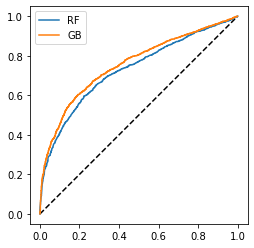

In [54]:
#Comparison between Random Forest Classifier and Gradient Boosting Classifier
fig, ax = plt.subplots()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_gb, tpr_gb, label='GB')
ax.set_aspect('equal')
plt.legend()
plt.show()
#Paolo: nice plot!

# Conclusions

- The Linear Regression model gives the best results to predict Total Seconds.  There is a margin error of up to 40 seconds, which is quite low but could definitely make a difference in a short run. 
- Both analysis of the performance of runners relative to sex were quite accurate. Sex seems to be a factor that influences the final time of the race as shown in the distribution of total seconds per sex. Is important to bare in mind that the two machine learning models explored produced good results given the lack of features in the data.


## Comments Paolo
Eva, you showed good understanding of the main concepts of machine learning- test/training, plotting the errors, difference between classification and regression, good work! A couple of ideas/suggestions
- When you plot the error, instead of plotting the two lines, consider plotting the difference (test-predicted) as it usually gives you a better insight, the two lines are often close to each other. You could also plot y_test vs y_predicted
- For the male/female prediction you also have an imbalanced problem, many more males than females,  maybe you could retry the predictions after balancing the classes after resampling (check imbalance lesson +lab)
- When you do the plotting of the histogramms maybe try to plot all data first without imposing restrictions (-40,40). Restrictions and limits you can always impose after having seen all of the data first
- For the random forests you could use the features_importance property to understand the importance of the features in making the predictions, which features count the most. I have added an example in the notebook